In [1]:
import matplotlib.pyplot as plt
import numpy as np

from numpy import exp,sin,cos,pi,sqrt
from IPython.display import clear_output 

In [2]:
from google.colab import files

In [3]:
!pip install clifford
clear_output()

In [4]:
from google.colab import files

In [5]:
import clifford 
from clifford.g3c import *

In [6]:
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

In [7]:
R12 = lambda lam : exp(-e12*pi*lam)
R23 = lambda lam : exp(-e23*pi*lam)
R31 = lambda lam : exp(e13*pi*lam)

T = lambda v : 1 - (v ^ einf / 2) #!!! have to set parenthesis like this, ^ operator follows -

    Belon, Hildenbrand 2017
    Practical Geometric Modeling Using Geometric Algebra Motors

In [8]:
def mlog(M):
    '''
    Motor logarithm from Chasles' Theorem
    as described in
    Dorst 2009, Geometric Algebra for Computer Science (Revised Edition), pp. 383

    M : Motor of form M = T_v R_Btheta
    '''
    R = -eo | (M*einf)
    #print("R",R)
    v = -2 * (eo | M)*R.inv()

    if R == 1.0:
        return -v*einf/2

   # print("v",v)

    B = R(2)/sqrt(float(-R(2)**2))
   # print("B",B)

    theta = -2 * np.arctan2(float(R(2)*B.inv()),float(R(0)))

   # print("theta",theta)

    lg = 1/2 * (-(v^B)*B.inv() + (1-R**2).inv()*((v|B)*theta))*einf - B*theta/2

    return lg 

# Test interpolation inbetween two motors (T & R)

In [9]:
B1_ = lambda alpha : 1-alpha
B2_ = lambda alpha : alpha

norm = lambda alpha : B1_(alpha) + B2_(alpha)
        
B1,B2 = lambda alpha : B1_(alpha)/norm(alpha), lambda alpha : B2_(alpha)/norm(alpha)

In [10]:
M1 = T(e1+e2)*R12(0.001)
M2 = T(-e2)*R12(0.501)

In [11]:
def interpolate(B1,B2,M1,M2):

    return lambda alpha : exp( B1(alpha)*mlog(M1) + B2(alpha)*mlog(M2) )

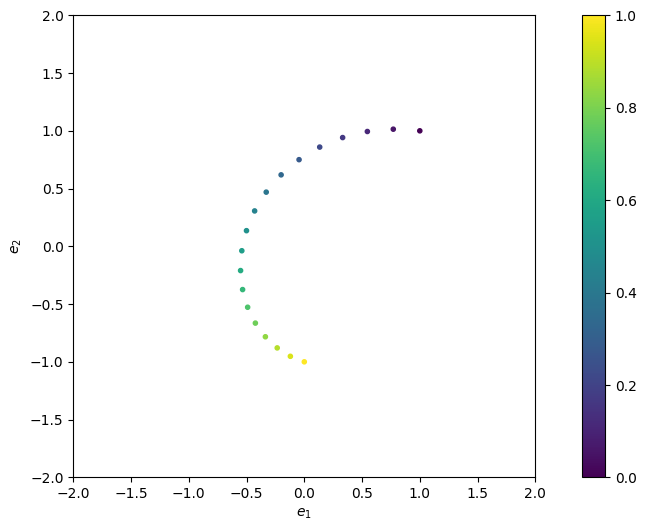

In [12]:
P0 = up(0)

alpha = np.linspace(0,1,19)
M = interpolate(B1,B2,M1,M2)(alpha)

P = M*P0*~M

plt.scatter(np.array(P|e1,dtype=float),
           np.array(P|e2,dtype=float),
            c = alpha,
            marker=".")



plt.colorbar()
plt.xlabel(r"$e_1$")
plt.ylabel(r"$e_2$")
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.gca().set_aspect('equal')
plt.show()

# Show rotation using adjacent points

In [13]:
M1 = T(e1+e2)*R12(0.00)
M2 = T(-e2)*R12(0.500)

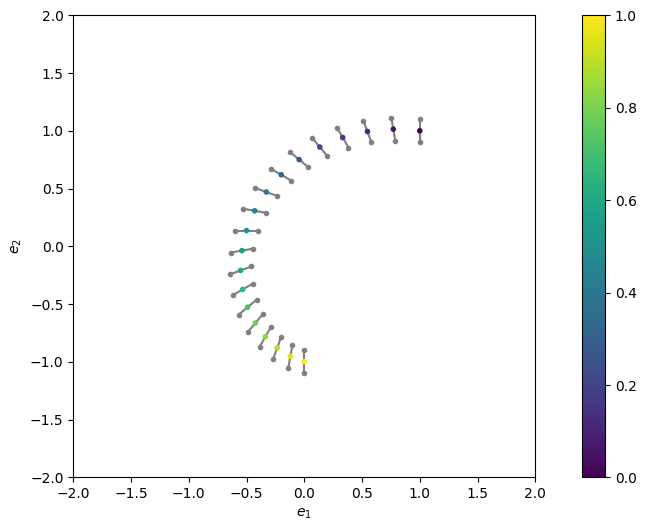

In [14]:
P0 = up(0)
Q0 = up(0.1*e2)
R0 = up(-0.1*e2)

alpha = np.linspace(0,1,19)
M = interpolate(B1,B2,M1,M2)(alpha)

P = M*P0*~M
Q = M*Q0*~M
R = M*R0*~M

plt.scatter(
    np.array(P|e1,dtype=float),
    np.array(P|e2,dtype=float),
    c = alpha,
    marker=".",
    zorder=2
    )

for p,q,r in zip(P,Q,R):
    
    plt.plot(
        [float(q|e1),float(r|e1)],
        [float(q|e2),float(r|e2)],
        marker=".",
        color="gray",
        zorder=1
    )



plt.colorbar()
plt.xlabel(r"$e_1$")
plt.ylabel(r"$e_2$")
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.gca().set_aspect('equal')
plt.show()

# Cube string

In [15]:
'''
B1_ = lambda alpha : np.where(alpha < 0.5, 1-2*alpha,0)
B2_ = lambda alpha : np.where(alpha < 0.5, 2*alpha,2*(1-alpha))
B3_ = lambda alpha : np.where(alpha < 0.5, 0,2*alpha-1)

'''
B1_ = lambda alpha : (alpha-1)**2
B2_ = lambda alpha : (-4*alpha*(alpha-1))**2
B3_ = lambda alpha : alpha**2


norm = lambda alpha : B1_(alpha) + B2_(alpha) + B3_(alpha)
        
B1,B2,B3 = lambda alpha : B1_(alpha)/norm(alpha), lambda alpha : B2_(alpha)/norm(alpha), lambda alpha : B3_(alpha)/norm(alpha),

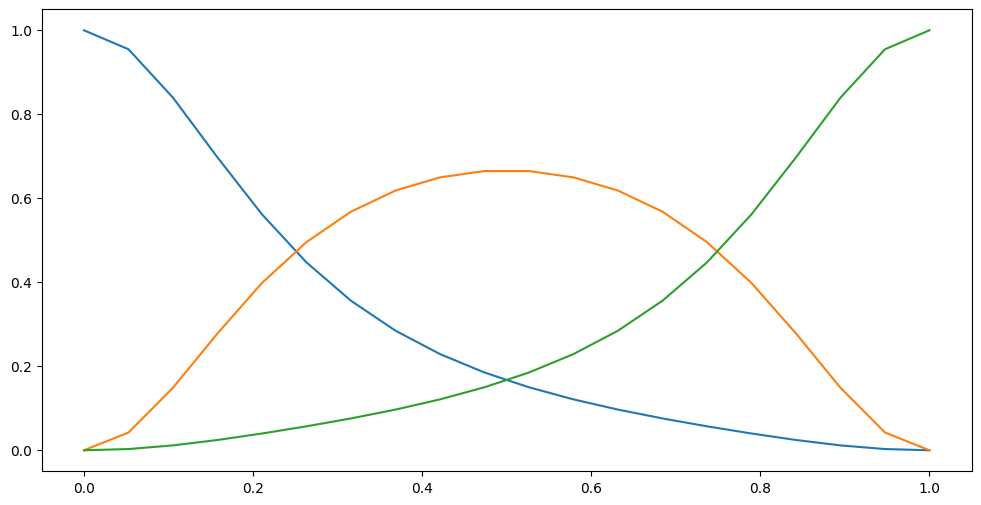

In [16]:
for B in B1,B2,B3:
    plt.plot(np.linspace(0,1,20),B(np.linspace(0,1,20)))

plt.show()

In [17]:
M1 = T(0.4*e2)*R12(0.25) 
M2 = T(e1 + e2)*R12(-0.125) 
M3 = T(2*e1)*R12(0.0)

In [18]:
def interpolate(B1,B2,B3,M1,M2,M3):

    return lambda alpha : exp( B1(alpha)*mlog(M1) + B2(alpha)*mlog(M2) + B3(alpha)*mlog(M3))

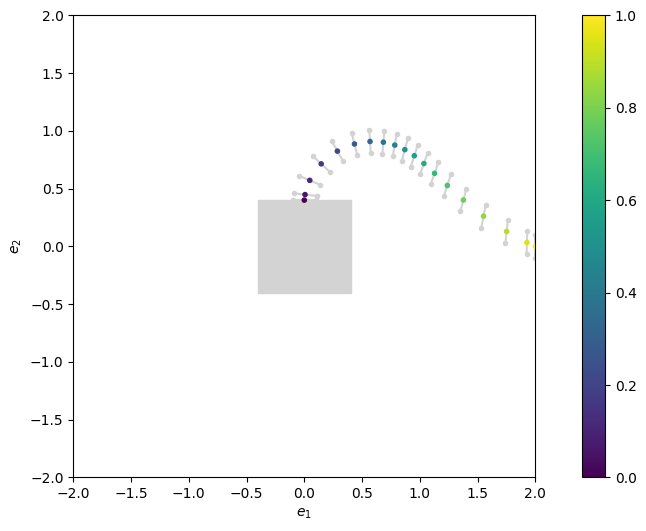

In [19]:
P0 = up(0)
Q0 = up(0.1*e2)
R0 = up(-0.1*e2)

alpha = np.linspace(0,1,19)
M = interpolate(B1,B2,B3,M1,M2,M3)(alpha)

P = M*P0*~M
Q = M*Q0*~M
R = M*R0*~M

plt.scatter(
    np.array(P|e1,dtype=float),
    np.array(P|e2,dtype=float),
    c = alpha,
    marker=".",
    zorder=3
    )

for p,q,r in zip(P,Q,R):
    
    plt.plot(
        [float(q|e1),float(r|e1)],
        [float(q|e2),float(r|e2)],
        marker=".",
        color="lightgray",
        zorder=2
    )

square = 0.4*np.array([e1+e2,-e1+e2,-e1-e2,e1-e2])
plt.fill(
    square|e1,
    square|e2,
    color = "lightgray",
    zorder=1)

plt.colorbar()
plt.xlabel(r"$e_1$")
plt.ylabel(r"$e_2$")
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.gca().set_aspect('equal')
plt.show()

# Building a function

In [20]:
B1_ = lambda alpha : (alpha-1)**2
B2_ = lambda alpha : (-5*alpha*(alpha-1))**4
B3_ = lambda alpha : alpha**2

norm = lambda alpha : B1_(alpha) + B2_(alpha) + B3_(alpha)
        
B1,B2,B3 = lambda alpha : B1_(alpha)/norm(alpha), lambda alpha : B2_(alpha)/norm(alpha), lambda alpha : B3_(alpha)/norm(alpha),

In [21]:
def interpolate(B1,B2,B3,M1,M2,M3):

    return lambda alpha : exp( B1(alpha)*mlog(M1) + B2(alpha)*mlog(M2) + B3(alpha)*mlog(M3))

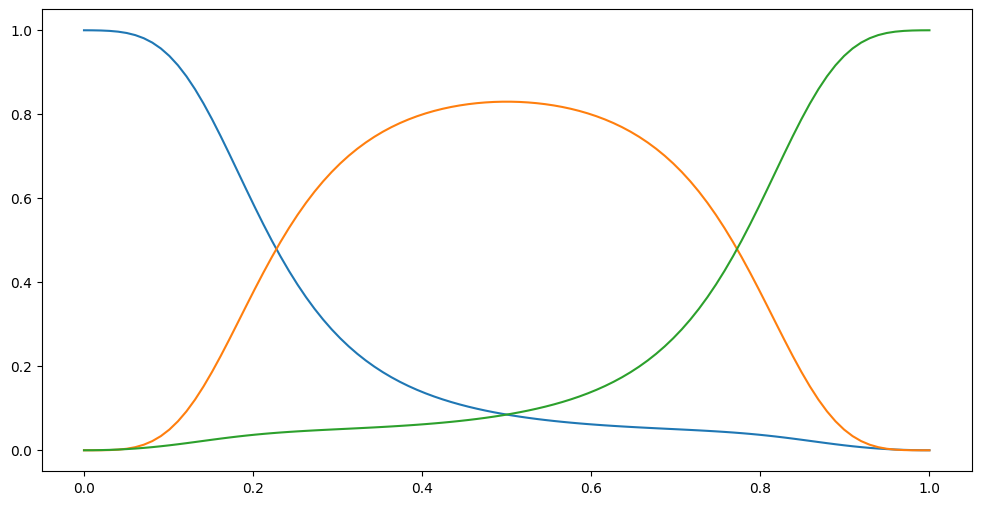

In [22]:
for B in B1,B2,B3:
    plt.plot(np.linspace(0,1,100),B(np.linspace(0,1,100)))

plt.show()

In [23]:
def W_2d(lam):

    side    = R12(lam)*0.4*e1*~R12(lam)
    halfway = 1.5*R12(lam/3)*e1*~R12(lam/3)

    M1 = T(side)*R12(lam) 
    M2 = T(halfway)*R12(-lam/2) 
    M3 = T(2*e1)*R12(0.0)

    P0 = up(0)
    Q0 = up(0.1*e2)
    R0 = up(-0.1*e2)

    alpha = np.linspace(0,1,19)
    M = interpolate(B1,B2,B3,M1,M2,M3)(alpha)

    P = M*P0*~M
    Q = M*Q0*~M
    R = M*R0*~M

    plt.scatter(
        np.array(P|e1,dtype=float),
        np.array(P|e2,dtype=float),
        c = alpha,
        marker=".",
        zorder=3
        )

    for p,q,r in zip(P,Q,R):
        
        plt.plot(
            [float(q|e1),float(r|e1)],
            [float(q|e2),float(r|e2)],
            marker=".",
            color="lightgray",
            zorder=2
        )

        square = R12(lam)*0.4*np.array([e1+e2,-e1+e2,-e1-e2,e1-e2])*~R12(lam)
        plt.fill(
            square|e1,
            square|e2,
            color = "lightgray",
            zorder=1)

    plt.colorbar()
    plt.xlabel(r"$e_1$")
    plt.ylabel(r"$e_2$")
    plt.xlim(-2,2)
    plt.ylim(-2,2)
    plt.gca().set_aspect('equal')
    plt.show()

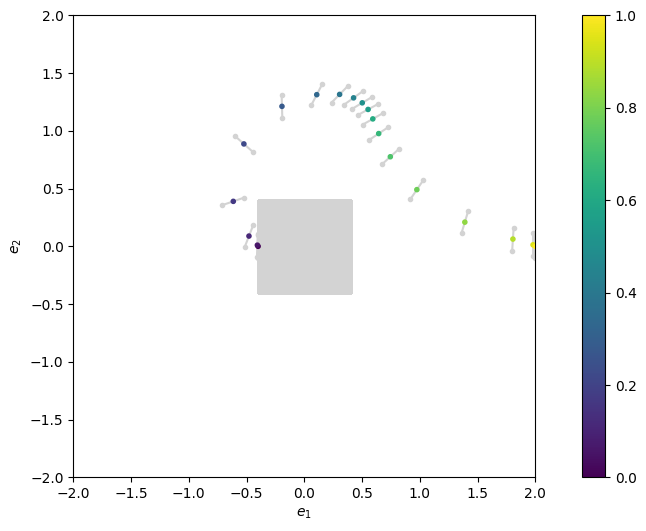

In [24]:
W_2d(0.5)

# In 3D, 2 Roto-translations

In [25]:
R12 = lambda lam : exp(-e12*pi*lam)
R23 = lambda lam : exp(-e23*pi*lam)
R31 = lambda lam : exp(e13*pi*lam)

T = lambda v : 1 - (v ^ einf / 2) #!!! have to set parenthesis like this, ^ operator follows -

In [26]:
B1_ = lambda alpha : 1 - alpha
B2_ = lambda alpha : alpha 

norm = lambda alpha : B1_(alpha) + B2_(alpha)
        
B1,B2 = lambda alpha : B1_(alpha)/norm(alpha), lambda alpha : B2_(alpha)/norm(alpha)

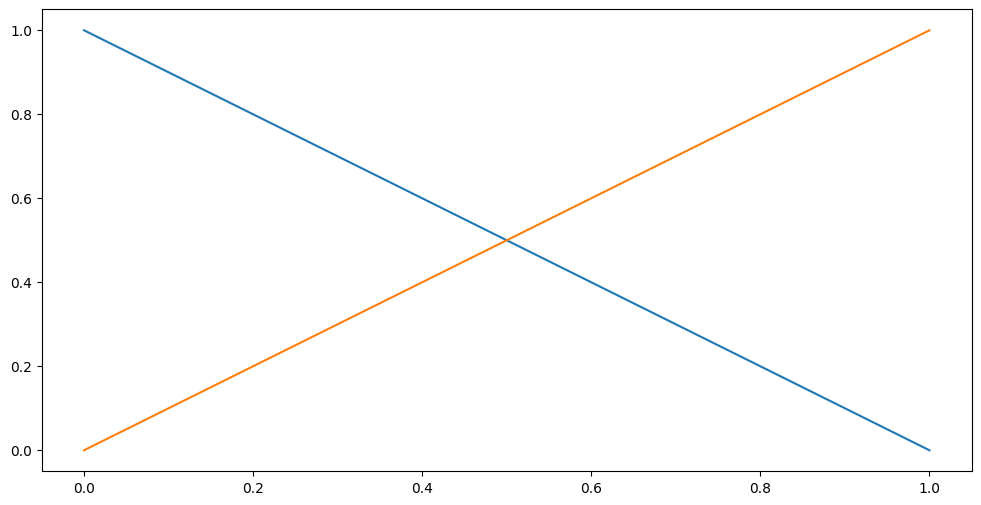

In [27]:
for B in B1,B2:
    plt.plot(np.linspace(0,1,100),B(np.linspace(0,1,100)))

plt.show()

In [28]:
def interpolate_2(B1,B2,M1,M2):

    return lambda alpha : exp( B1(alpha)*mlog(M1) + B2(alpha)*mlog(M2) )

In [29]:
def W_3d_2(lam, proj = False):

    side    = R12(lam)*0.2*e1*~R12(lam)

    '''
                    # \/ this plane rot in R23(lam/2) as well
    M1 = T(side)    * R12(lam)    #* R23(-1)
    M3 = T(2.0*e1)  * R12(0.0) 
    '''
                        # natural twisting motion using M1~R12 and M2~R23e12?
    M1 = T(side)    * R12(lam) * R23(-0.5)
    M2 = T(2.0*e1)    
    


    P0 = up(0)
    Q0 = up(0.2*e2)
    R0 = up(-0.2*e2)

    alpha = np.linspace(0,1,20)
    M = interpolate_2(B1,B2,M1,M2)(alpha)

    P = M*P0*~M
    Q = M*Q0*~M
    R = M*R0*~M
    	
    if proj:
        a,b = (e2,e3) if proj == e1 else (-e1,e3) if proj == e2 else (e1,e2)

        ax = plt.figure().add_subplot()


        ax.scatter(
            np.array((P|a)(0),dtype=float),
            np.array((P|b)(0),dtype=float),
            c = alpha,
            marker=".",
            zorder=3
            )

        for p,q,r in zip(P,Q,R):
            
            ax.plot(
                [float((q|a)(0)),float((r|a)(0))],
                [float((q|b)(0)),float((r|b)(0))],
                marker=".",
                lw = 1,
                ms = 0,
                color="gray",
                zorder=2
            )

            ax.scatter(
                float((q|a)(0)),
                float((q|b)(0)),
                marker=".",
                color="red",
                zorder=4)
            
            square = R12(lam)*0.2*np.array([e1+e2,-e1+e2,-e1-e2,e1-e2])*~R12(lam)
            ax.fill(
                square|a,
                square|b,
                color = "lightgray",
                zorder=1)

            

        ax.set_xlabel(f"{a}")
        ax.set_ylabel(f"{b}")

        ax.set_xlim(-2,2)
        ax.set_ylim(-2,2)

        plt.gca().set_aspect('equal')
        plt.show()


    else:

        ax = plt.figure().add_subplot(projection='3d')


        ax.scatter(
            np.array((P|e1)(0),dtype=float),
            np.array((P|e2)(0),dtype=float),
            np.array((P|e3)(0),dtype=float),
            c = alpha,
            marker=".",
            zorder=3
            )

        for p,q,r in zip(P,Q,R):
            
            ax.plot(
                [float((q|e1)(0)),float((r|e1)(0))],
                [float((q|e2)(0)),float((r|e2)(0))],
                [float((q|e3)(0)),float((r|e3)(0))],
                marker=".",
                lw = 1,
                ms = 0,
                color="gray",
                zorder=2
            )

            ax.scatter(
                float((q|e1)(0)),
                float((q|e2)(0)),
                float((q|e3)(0)),
                color="red",
                marker=".",
                zorder=4)
            '''
            square = R12(lam)*0.4*np.array([e1+e2,-e1+e2,-e1-e2,e1-e2])*~R12(lam)
            ax.fill(
                square|e1,
                square|e2,
                color = "lightgray",
                zorder=1)

            '''

        ax.set_xlabel(r"$e_1$")
        ax.set_ylabel(r"$e_2$")
        ax.set_zlabel(r"$e_3$")

        ax.set_xlim(-2,2)
        ax.set_ylim(-2,2)
        ax.set_zlim(-2,2)

        #plt.gca().set_aspect('equal')
        plt.show()

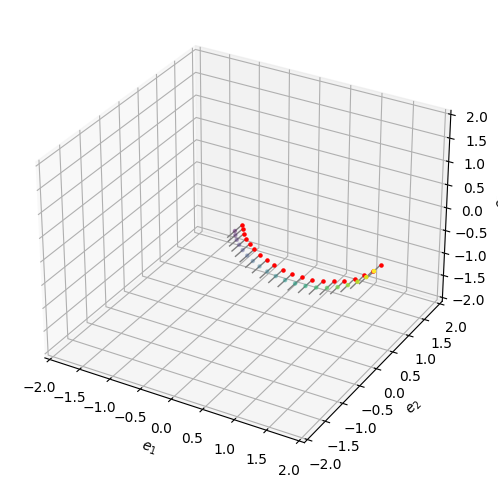

In [30]:
W_3d_2(1.5,proj = False)

# In 3D, 3 Roto-translations

In [31]:
R12 = lambda lam : exp(-e12*pi*lam)
R23 = lambda lam : exp(-e23*pi*lam)
R31 = lambda lam : exp(e13*pi*lam)

T = lambda v : 1 - (v ^ einf / 2) #!!! have to set parenthesis like this, ^ operator follows -

In [32]:
B1_ = lambda alpha : (alpha-1)**2
B2_ = lambda alpha : 10*alpha**2*(alpha-1)**4
B3_ = lambda alpha : (alpha)**3

norm = lambda alpha : B1_(alpha) + B2_(alpha) + B3_(alpha)
        
B1,B2,B3 = lambda alpha : B1_(alpha)/norm(alpha), lambda alpha : B2_(alpha)/norm(alpha), lambda alpha : B3_(alpha)/norm(alpha),

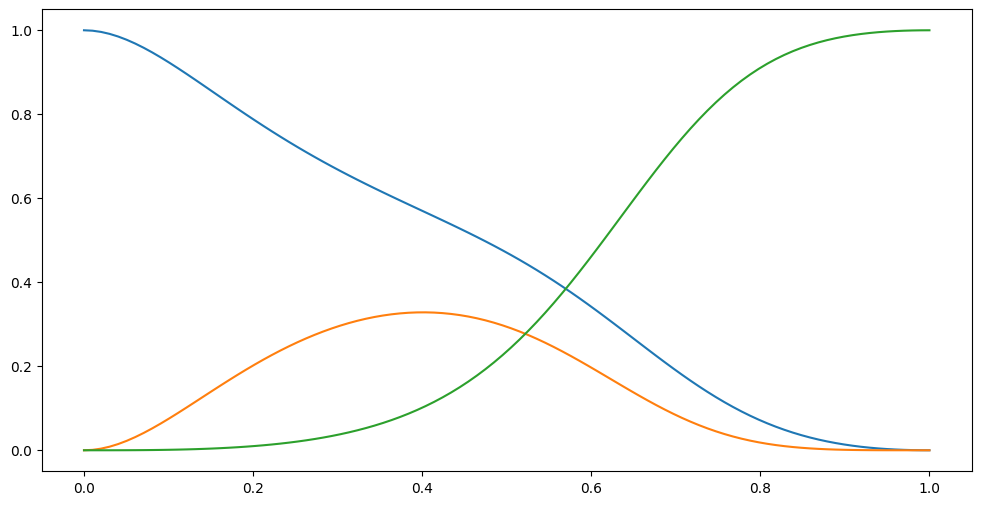

In [33]:
for B in B1,B2,B3:
    plt.plot(np.linspace(0,1,100),B(np.linspace(0,1,100)))

plt.show()

In [34]:
def interpolate_3(B1,B2,B3,M1,M2,M3):

    return lambda alpha : exp( B1(alpha)*mlog(M1) + B2(alpha)*mlog(M2) + B3(alpha)*mlog(M3))

In [35]:
def W_3d(lam, proj = False, ax = False):
    '''
    prints the three rotor interpolation in proj with axis (e1,e2 or e3)
    
    returns graph for colormap of interpolation param

    '''


    side    = R12(lam)*0.3*e1*~R12(lam)
    halfway = R12(lam)*e1*~R12(lam)

                        # natural twisting motion using M1~R12 and M2~R23e12?
    M1 = T(side)    * R12(lam) * R23(-0.5)
    M2 = T(halfway) * R12(lam) * R23(-0.5) #exp(-(R23(lam/2)*e12*~R23(lam/2))*pi*-lam/4) 
    M3 = T(2.0*e1)    
    


    P0 = up(0)
    Q0 = up(0.2*e2)
    R0 = up(-0.2*e2)

    alpha = np.linspace(0,1,20)
    M = interpolate_3(B1,B2,B3,M1,M2,M3)(alpha)

    P = M*P0*~M
    Q = M*Q0*~M
    R = M*R0*~M
    	
    if proj: #2d projection rendering
        a,b = (e2,e3) if proj == e1 else (-e1,e3) if proj == e2 else (e1,e2)

        if not ax:
            ax = plt.figure().add_subplot()

        # render colored centerline 
        cgraph = ax.scatter(
            np.array((P|a)(0),dtype=float),
            np.array((P|b)(0),dtype=float),
            c = alpha,
            marker=".",
            zorder= np.array((P|proj)(0)*10,dtype=int)[7]
            )

        for p,q,r in zip(P,Q,R):
            
            # render boundary of band
            ax.plot(
                [float((q|a)(0)),float((r|a)(0))],
                [float((q|b)(0)),float((r|b)(0))],
                marker=".",
                lw = 1,
                ms = 0,
                color="gray",
                zorder= int((q|proj)(0)*10)
            )

            
            # mark right boundary in red
            ax.scatter(
                float((q|a)(0)),
                float((q|b)(0)),
                marker=".",
                color="red",
                zorder= int((q|proj)(0)*10)
                )
            
            # render rotating square
            square = R12(lam)*0.3*np.array([e1+e2,-e1+e2,-e1-e2,e1-e2])*~R12(lam)
            ax.fill(
                square|a,
                square|b,
                color = "lightgray",
                zorder= 0 )

            

        ax.set_xlabel(f"{a}")
        ax.set_ylabel(f"{b}")

        ax.set_xlim(-2,2)
        ax.set_ylim(-2,2)

        ax.set_aspect('equal', 'box')
        #plt.show()


    else: #3d plot

        if not ax:

            ax = plt.figure().add_subplot(projection='3d')

        # centerline with colormap
        cgraph = ax.scatter(
            np.array((P|e1)(0),dtype=float),
            np.array((P|e2)(0),dtype=float),
            np.array((P|e3)(0),dtype=float),
            c = alpha,
            marker=".",
            zorder=3
            )

        for p,q,r in zip(P,Q,R):
            
            # boundary of rotating band
            ax.plot(
                [float((q|e1)(0)),float((r|e1)(0))],
                [float((q|e2)(0)),float((r|e2)(0))],
                [float((q|e3)(0)),float((r|e3)(0))],
                marker=".",
                lw = 1,
                ms = 0,
                color="gray",
                zorder=2
            )

            # marking right boundary as red
            ax.scatter(
                float((q|e1)(0)),
                float((q|e2)(0)),
                float((q|e3)(0)),
                color="red",
                marker=".",
                zorder=4)
            '''
            square = R12(lam)*0.4*np.array([e1+e2,-e1+e2,-e1-e2,e1-e2])*~R12(lam)
            ax.fill(
                square|e1,
                square|e2,
                color = "lightgray",
                zorder=1)

            '''

        ax.set_xlabel(r"$e_1$")
        ax.set_ylabel(r"$e_2$")
        ax.set_zlabel(r"$e_3$")

        ax.set_xlim(-2,2)
        ax.set_ylim(-2,2)
        ax.set_zlim(-2,2)

        #plt.gca().set_aspect('equal')
        #plt.show()

    return cgraph

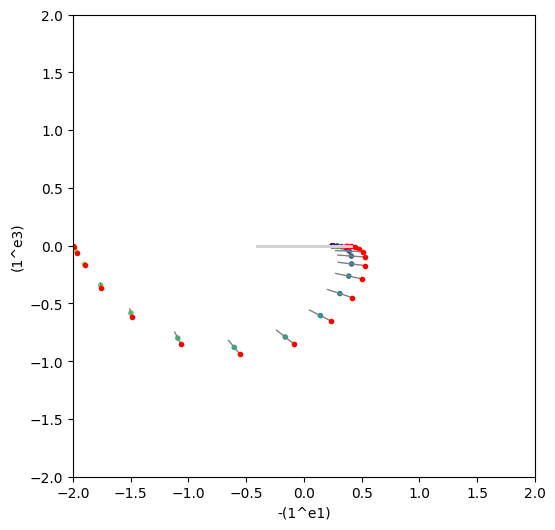

In [36]:
W_3d(1.6,proj = e2)

plt.show()

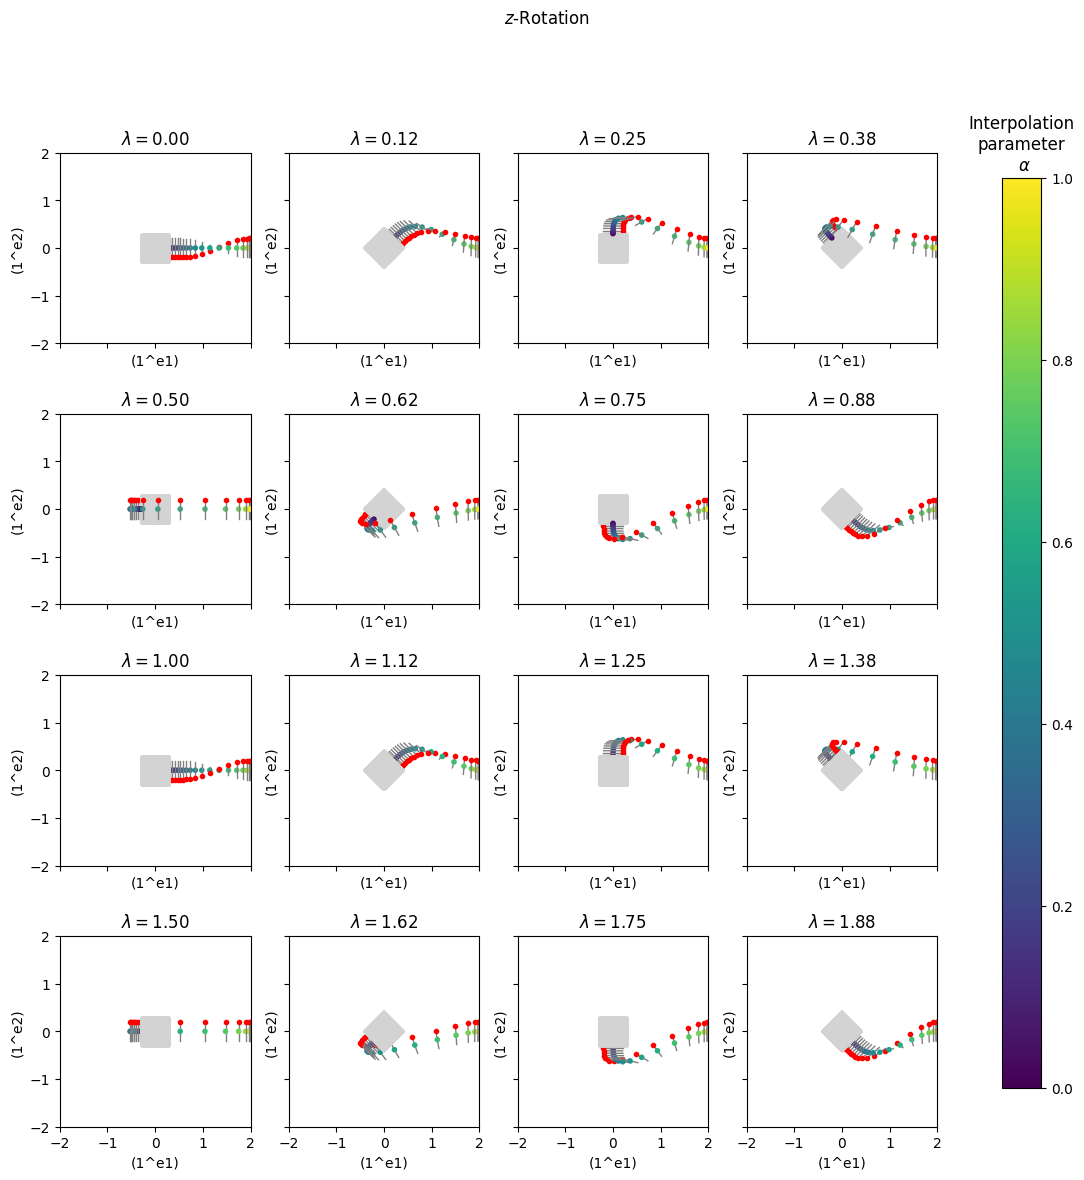

In [37]:
N = 4
M = 4

fig,axs = plt.subplots(M,N, sharex=True, sharey=True, )
fig.suptitle(r"$z$-Rotation")
fig.set_size_inches(13,13)
#fig.set_layout_engine(layout="tight")

for lam,ax in zip(np.linspace(0.0,2.0,M*N,endpoint=False),axs.ravel()):

    ax.set_title(f"$\\lambda = {lam:.2f}$")
    cgraph = W_3d(lam,proj = e3, ax = ax)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.03, 0.7])
cbar_ax.set_title("Interpolation\nparameter\n $\\alpha$")
fig.colorbar(cgraph, cax=cbar_ax)



'''
plt.savefig("spinor_band_z_rot.png",format="png", transparent=True)
files.download("spinor_band_z_rot.png") 
'''

plt.show()

# Ribbon unwinding 

In [167]:
R12 = lambda lam : exp(-e12*pi*lam)
R23 = lambda lam : exp(-e23*pi*lam)
R31 = lambda lam : exp(e13*pi*lam)

T = lambda v : 1 - (v ^ einf / 2) #!!! have to set parenthesis like this, ^ operator follows -

In [364]:
B1_ = lambda alpha : (alpha-1)**4
B2_ = lambda alpha : 4*alpha**2*(alpha-1)**4
B3_ = lambda alpha : alpha**3

norm = lambda alpha : B1_(alpha) + B2_(alpha) + B3_(alpha)
        
B1,B2,B3 = lambda alpha : B1_(alpha)/norm(alpha), lambda alpha : B2_(alpha)/norm(alpha), lambda alpha : B3_(alpha)/norm(alpha)

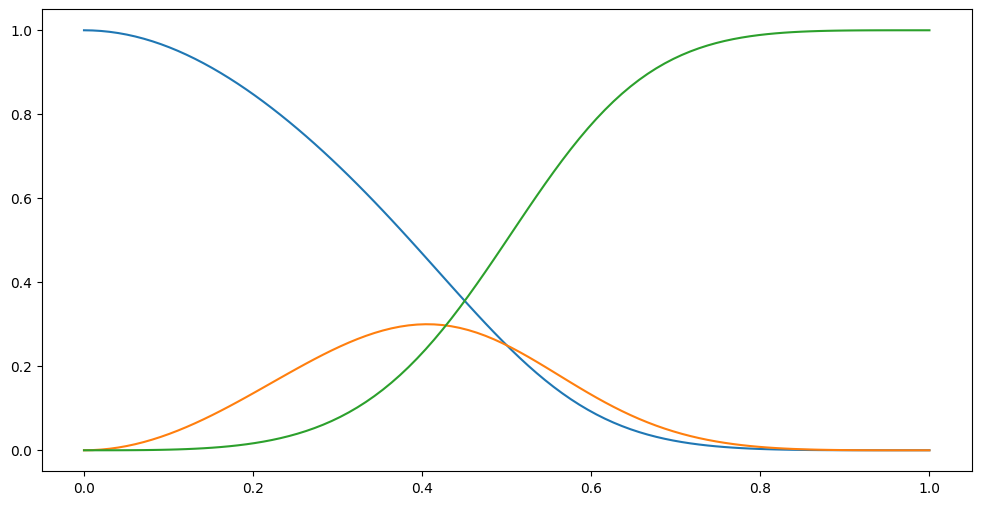

In [365]:
for B in B1,B2,B3:
    plt.plot(np.linspace(0,1,100),B(np.linspace(0,1,100)))

plt.show()

In [366]:
def interpolate_4(B1,B2,B3,M1,M2,M3):

    return lambda alpha : exp( B1(alpha)*mlog(M1) + B2(alpha)*mlog(M2) + B3(alpha)*mlog(M3))

In [367]:
def W_3d(lam, wind = 0,proj = False, ax = False):
    '''
    prints the three rotor interpolation in proj with axis (e1,e2 or e3)
    
    returns graph for colormap of interpolation param

    '''


    side    = R12(lam)*0.3*e1*~R12(lam)
    halfway = R12(lam)*2*e1*~R12(lam)

                        # natural twisting motion using M1~R12 and M2~R23e12?
    M1 = T(side)    * R12(lam) * R23(-0.5)
    M2 = T(halfway) * R12(lam) * R23(-0.5)    #exp(-(R23(lam/2)*e12*~R23(lam/2))*pi*-lam/4) 
    M3 = T(2*e1)    
    


    P0 = up(0)
    Q0 = up(0.1*e2)
    R0 = up(-0.1*e2) #*R23(-wind/2)*e2*~R23(-wind/2)

    alpha = np.linspace(0,1,20)
    M = R23(wind/2)*interpolate_4(B1,B2,B3,M1,M2,M3)(alpha)*R23(-wind/2) #

    P = M*P0*~M
    Q = M*Q0*~M
    R = M*R0*~M
    	
    if proj: #2d projection rendering
        a,b = (e2,e3) if proj == e1 else (-e1,e3) if proj == e2 else (e1,e2)

        if not ax:
            ax = plt.figure().add_subplot()

        # render colored centerline 
        cgraph = ax.scatter(
            np.array((P|a)(0),dtype=float),
            np.array((P|b)(0),dtype=float),
            c = alpha,
            marker=".",
            zorder= np.array((P|proj)(0)*10,dtype=int)[7]
            )

        for p,q,r in zip(P,Q,R):
            
            # render boundary of band
            ax.plot(
                [float((q|a)(0)),float((r|a)(0))],
                [float((q|b)(0)),float((r|b)(0))],
                marker=".",
                lw = 1,
                ms = 0,
                color="gray",
                zorder= int((q|proj)(0)*10)
            )

            
            # mark right boundary in red
            ax.scatter(
                float((q|a)(0)),
                float((q|b)(0)),
                marker=".",
                color="red",
                zorder= int((q|proj)(0)*10)
                )
            
            # render rotating square
            square = R12(lam)*0.3*np.array([e1+e2,-e1+e2,-e1-e2,e1-e2])*~R12(lam)
            ax.fill(
                square|a,
                square|b,
                color = "lightgray",
                zorder= 0 )

        IM = R23(wind/2)*np.array([M1,M2,M3]) *R23(-wind/2)

        K = IM*Q0*~IM
        L = IM*R0*~IM  
        # control points
        for k,l in zip(K,L):
            ax.plot(
                [float((k|a)(0)),float((l|a)(0))],
                [float((k|b)(0)),float((l|b)(0))],
                marker=".",
                lw = 1,
                ms = 0,
                color="black",
                zorder=2
            )

            ax.scatter(
                float((k|a)(0)),
                float((k|b)(0)),
                color="red",
                marker=".",
                zorder=4)

            

        ax.set_xlabel(f"{a}")
        ax.set_ylabel(f"{b}")

        ax.set_xlim(-2,2)
        ax.set_ylim(-2,2)

        ax.set_aspect('equal', 'box')
        #plt.show()


    else: #3d plot

        if not ax:

            ax = plt.figure().add_subplot(projection='3d')

        # centerline with colormap
        cgraph = ax.scatter(
            np.array((P|e1)(0),dtype=float),
            np.array((P|e2)(0),dtype=float),
            np.array((P|e3)(0),dtype=float),
            c = alpha,
            marker=".",
            zorder=3
            )

        for p,q,r in zip(P,Q,R):
            
            # boundary of rotating band
            ax.plot(
                [float((q|e1)(0)),float((r|e1)(0))],
                [float((q|e2)(0)),float((r|e2)(0))],
                [float((q|e3)(0)),float((r|e3)(0))],
                marker=".",
                lw = 1,
                ms = 0,
                color="gray",
                zorder=2
            )

            # marking right boundary as red
            ax.scatter(
                float((q|e1)(0)),
                float((q|e2)(0)),
                float((q|e3)(0)),
                color="red",
                marker=".",
                zorder=4)
            

            IM = R23(wind/2)*np.array([M1,M2,M3]) * R23(-wind/2) #

            K = IM*Q0*~IM
            L = IM*R0*~IM

            # control points
            for k,l in zip(K,L):
                ax.plot(
                    [float((k|e1)(0)),float((l|e1)(0))],
                    [float((k|e2)(0)),float((l|e2)(0))],
                    [float((k|e3)(0)),float((l|e3)(0))],
                    marker=".",
                    lw = 1,
                    ms = 0,
                    color="black",
                    zorder=2
                )

                ax.scatter(
                    float((k|e1)(0)),
                    float((k|e2)(0)),
                    float((k|e3)(0)),
                    color="red",
                    marker=".",
                    zorder=4)

        ax.set_xlabel(r"$e_1$")
        ax.set_ylabel(r"$e_2$")
        ax.set_zlabel(r"$e_3$")

        ax.set_xlim(-5,5)
        ax.set_ylim(-5,5)
        ax.set_zlim(-5,5)

        #plt.gca().set_aspect('equal')
        #plt.show()

    return cgraph

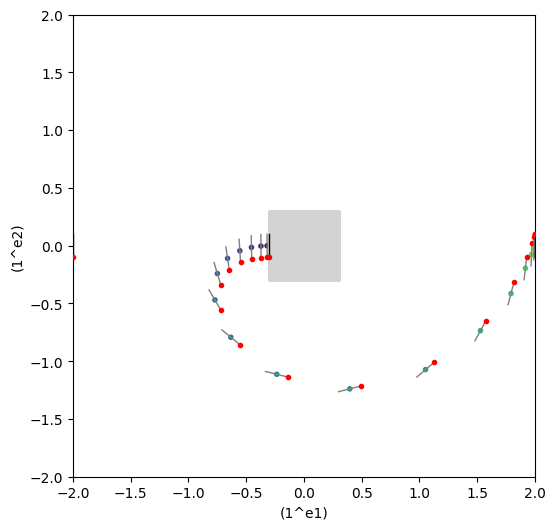

In [368]:
W_3d(0.5,wind = 0.5,proj = e3)

plt.show()

Testen der Verschiebung des Ribbons _auf_ den verschiedenen Motoren, sowohl in breite als auch normalrichtung, anpassen mithilfe der Motoren -> konstruktion des beliebig twistenden robbons 

Separate weights in Motor interpolation of Translational and Rotational component